In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_txt_to_list(filename):
  """
  讀取一個 .txt 文件，並將其每一行作為一個項目存入列表中。

  Args:
    filename (str): 要讀取的文件的名稱。

  Returns:
    list: 一個包含文件每行內容的字符串列表。
          如果文件不存在或發生錯誤，則返回一個空列表。
  """
  try:
    # 使用 'with' 陳述式來安全地打開文件進行讀取 ('r' 模式)
    with open(filename, 'r', encoding='utf-8') as f:
      # 讀取文件的所有行，並將它們作為一個列表返回
      # 使用 .strip() 來移除每行末尾的換行符 ('\n') 和其他前後空白
      lines = [float(line.strip()) for line in f.readlines()]
      return lines
  except FileNotFoundError:
    # 如果文件不存在，打印錯誤訊息並返回空列表
    print(f"錯誤：找不到文件 '{filename}'。")
    return []
  except IOError as e:
    # 處理其他可能的文件讀取錯誤
    print(f"讀取文件時發生錯誤：{e}")
    return []

In [3]:


def plot_quantile_ratio(list1, list2):
    """
    绘制两个数值列表的分位数对比曲线
    
    参数：
    list1 (list): 第一个数值列表
    list2 (list): 第二个数值列表
    label1 (str): 第一条曲线的标签（默认'List 1'）
    label2 (str): 第二条曲线的标签（默认'List 2'）
    """
    # 转换为numpy数组
    arr1 = np.array(list1)
    arr2 = np.array(list2)
    
    # 生成从0.1%到99.9%的1000个分位点（包含两端）
    quantiles = np.linspace(0.001, 0.999, 999)
    
    # 计算各分位点对应的值
    q_values1 = np.quantile(arr1, quantiles)
    q_values2 = np.quantile(arr2, quantiles)
    

    ratio = np.divide(q_values1, q_values2)
    # 创建画布
    plt.figure(figsize=(3.5,3))
    
    # 绘制分位数曲线
    plt.plot(quantiles*100, ratio, 
             color='red', lw=1.5, 
             alpha=0.8, label='co-occurrence ratio')
    
    # 装饰图表
    # plt.title('Quantile Comparison\n(0.1% to 99.9%)', pad=20)
    plt.xlabel('Quantile (%)', labelpad=12)
    plt.ylabel('SNR', labelpad=12)
    # plt.yscale('log')
    # plt.legend(loc='upper left', frameon=False)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 100)
    
    # 设置刻度
    plt.xticks(np.arange(0, 101, 10))
    plt.gca().set_xticklabels([f'{int(x)}' for x in np.arange(0, 101, 10)])
    
    plt.tight_layout()
    plt.show()




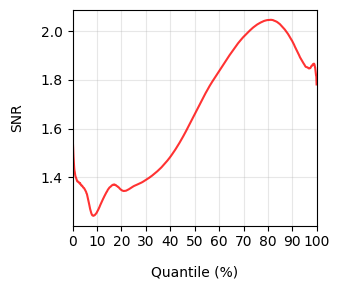

In [4]:
cooccurence_value_microbiome = read_txt_to_list('cooccurence_value_microbiome_real.txt')
cooccurence_value_microbiome_rand = read_txt_to_list('cooccurence_value_microbiome_rand.txt')
plot_quantile_ratio(cooccurence_value_microbiome, cooccurence_value_microbiome_rand)

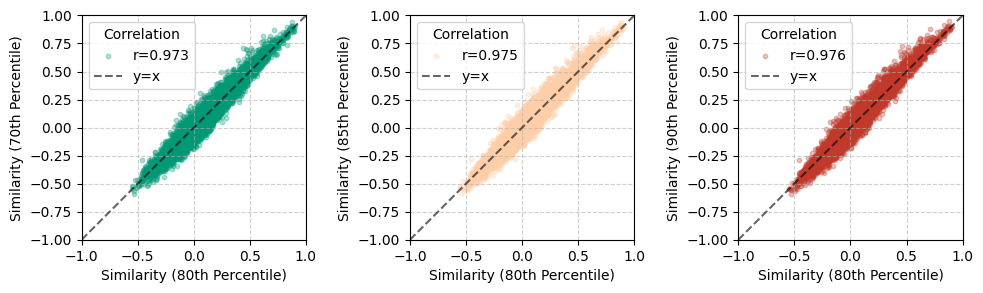

Pearson correlation between 80th and 70th percentile x_max similarities: 0.973
Pearson correlation between 80th and 85th percentile x_max similarities: 0.975
Pearson correlation between 80th and 90th percentile x_max similarities: 0.976


In [7]:
sim_list_80 = read_txt_to_list('percentile_80.txt')
sim_list_70 = read_txt_to_list('percentile_70.txt')
sim_list_85 = read_txt_to_list('percentile_85.txt')
sim_list_90 = read_txt_to_list('percentile_90.txt')


# --- 计算 Pearson 相关性系数 ---
correlation_80_70 = np.corrcoef(sim_list_80, sim_list_70)[0, 1]
correlation_80_85 = np.corrcoef(sim_list_80, sim_list_85)[0, 1]
correlation_80_90 = np.corrcoef(sim_list_80, sim_list_90)[0, 1]

# --- 绘制子图 ---
# 创建一个包含一行三列子图的图表
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) # 调整 figsize 可以改变图表整体大小

# 绘制 percentile=80 vs percentile=70 的散点图 (第一个子图)
axes[0].scatter(sim_list_80, sim_list_70, color='#019875', alpha=0.3, label=f'r={correlation_80_70:.3f}', s=10)
axes[0].plot([-1, 1], [-1, 1], 'k--', alpha=0.6, label='y=x') # 添加参考线
axes[0].set_xlabel('Similarity (80th Percentile)')
axes[0].set_ylabel('Similarity (70th Percentile)')
# axes[0].set_title('80th vs 70th Percentile')
axes[0].set_xlim(-1, 1)
axes[0].set_ylim(-1, 1)
axes[0].set_aspect('equal', adjustable='box')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend(title='Correlation')

# 绘制 percentile=80 vs percentile=85 的散点图 (第二个子图)
axes[1].scatter(sim_list_80, sim_list_85, color='#FECEA8', alpha=0.3, label=f'r={correlation_80_85:.3f}', s=10)
axes[1].plot([-1, 1], [-1, 1], 'k--', alpha=0.6, label='y=x') # 添加参考线
axes[1].set_xlabel('Similarity (80th Percentile)')
axes[1].set_ylabel('Similarity (85th Percentile)')
# axes[1].set_title('80th vs 85th Percentile')
axes[1].set_xlim(-1, 1)
axes[1].set_ylim(-1, 1)
axes[1].set_aspect('equal', adjustable='box')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend(title='Correlation')

# 绘制 percentile=80 vs percentile=90 的散点图 (第三个子图)
axes[2].scatter(sim_list_80, sim_list_90, color='#C0392B', alpha=0.3, label=f'r={correlation_80_90:.3f}', s=10)
axes[2].plot([-1, 1], [-1, 1], 'k--', alpha=0.6, label='y=x') # 添加参考线
axes[2].set_xlabel('Similarity (80th Percentile)')
axes[2].set_ylabel('Similarity (90th Percentile)')
# axes[2].set_title('80th vs 90th Percentile')
axes[2].set_xlim(-1, 1)
axes[2].set_ylim(-1, 1)
axes[2].set_aspect('equal', adjustable='box')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].legend(title='Correlation')

# 自动调整子图布局，避免重叠
plt.tight_layout()

# 显示图表
plt.show()

# --- 打印 Pearson 相关性系数 (保持不变) ---
print(f"Pearson correlation between 80th and 70th percentile x_max similarities: {correlation_80_70:.3f}")
print(f"Pearson correlation between 80th and 85th percentile x_max similarities: {correlation_80_85:.3f}")
print(f"Pearson correlation between 80th and 90th percentile x_max similarities: {correlation_80_90:.3f}")